## Машинное обучение 1, ПМИ ФКН ВШЭ

## Практическое домашнее задание 1

### Общая информация

Дата выдачи: 09.09.2022

Мягкий дедлайн: 23:59MSK 22.09.2022

Жесткий дедлайн: 23:59MSK 29.09.2022

### О задании

Задание состоит из двух разделов, посвященных работе с табличными данными с помощью библиотеки pandas и визуализации с помощью matplotlib. В первом разделе вам предстоит выполнить базовые задания с помощью вышеуказанных библиотек, а во втором распределить студентов по курсам. Баллы даются за выполнение отдельных пунктов. Задачи в рамках одного раздела рекомендуется решать в том порядке, в котором они даны в задании.

Задание направлено на освоение jupyter notebook (будет использоваться в дальнейших заданиях), библиотек pandas и matplotlib.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после жёсткого дедлайна нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

### Формат сдачи
Задания сдаются через систему Anytask. Инвайт можно получить у семинариста или ассистента. Присылать необходимо ноутбук с выполненным заданием. Сам ноутбук называйте в формате homework-practice-01-pandas-Username.ipynb, где Username — ваша фамилия.

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже.

Оценка: 10 (+ возможно бонус за отсутствие цикла по курсам).

## 0. Введение

Сейчас мы находимся в jupyter-ноутбуке (или ipython-ноутбуке). Это удобная среда для написания кода, проведения экспериментов, изучения данных, построения визуализаций и других нужд, не связанных с написанием production-кода. 

Ноутбук состоит из ячеек, каждая из которых может быть либо ячейкой с кодом, либо ячейкой с текстом размеченным и неразмеченным. Текст поддерживает markdown-разметку и формулы в Latex.

Для работы с содержимым ячейки используется *режим редактирования* (*Edit mode*, включается нажатием клавиши **Enter** после выбора ячейки), а для навигации между ячейками искользуется *командный режим* (*Command mode*, включается нажатием клавиши **Esc**). Тип ячейки можно задать в командном режиме либо с помощью горячих клавиш (**y** to code, **m** to markdown, **r** to edit raw text), либо в меню *Cell -> Cell type*. 

После заполнения ячейки нужно нажать *Shift + Enter*, эта команда обработает содержимое ячейки: проинтерпретирует код или сверстает размеченный текст.

In [86]:
# ячейка с кодом, при выполнении которой появится output
import itertools
import numpy as np

2 + 2

4

Ячейка с неразмеченыным текстом.

Попробуйте создать свои ячейки, написать какой-нибудь код и текст какой-нибудь формулой.

In [87]:
print('Hello, ML!')

Hello, ML!


Немного латеха не помешает

$\[
\frac{d}{dx}\int F(x) dx=F(x)
\]$

[Здесь](https://athena.brynmawr.edu/jupyter/hub/dblank/public/Jupyter%20Notebook%20Users%20Manual.ipynb) находится <s>не</s>большая заметка о используемом языке разметки Markdown. Он позволяет:

0. Составлять упорядоченные списки
1. Выделять *текст* <s>при</s> **необходимости**
2. Добавлять [ссылки](http://imgs.xkcd.com/comics/the_universal_label.png)


* Составлять неупорядоченные списки

Делать вставки с помощью LaTex:
    
$
\left\{
\begin{array}{ll}
x = 16 \sin^3 (t) \\ 
y = 13 \cos (t) - 5 \cos (2t) - 2 \cos (3t) - \cos (4t) \\
t \in [0, 2 \pi]
\end{array}
\right.$

А ещё можно вставлять картинки, или гифки, или что захотите:

<img src="https://media1.tenor.com/images/9b8fbe9214504bcf6c60fe4e4f7e114e/tenor.gif?itemid=5416416" style="width: 400px">

### Google Colab

Что за колаб? 

**Google Colab (Colaboratory)** это **Jupyter Notebook + Cloud + Google Drive.**

Компания Google предоставляет возможность бесплатно запускать ноутбуки (предварительно загрузив их на свой гугл-диск) прямо в облаке. При этом вам не требуется установка никаких пакетов на свою машину, а работать можно прямиком из браузера. Вот ссылка:

https://colab.research.google.com

При использовании вы увидете много сходств с jupyter ноутбуком. Одним из преимуществ является доступность GPU, соответствующую опцию можно активировать в настройках сервиса. При желании вы сможете найти в интернете много туториалов по использованию или разобраться самостоятельно =)

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных.

Основной объект в pandas — это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [88]:
%pylab inline
import pandas as pd

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


<span style="color:red">Перед выполнением задания необходимо ознакомиться с первым семинаром (seminars/sem01-pandas.ipynb) </span>.

Это поможет вам получить общее понимание происходяшего и успешнее справиться с заданием.

Также успешному выполнению способствует внимательное чтение текста задания от начала до конца.

Удачи!

Скачаем подготовленные на семинаре данные:

In [89]:
!wget  -O 'end_seminar.xlsx' -q 'https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0'

"wget" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


Для пользователей Windows: скачайте файл самостоятельно и поместите его в папку с тетрадкой. Или попробуйте один из следующих вариантов:

In [90]:
# !powershell iwr -outf somefile https://somesite/somefile

In [91]:
# !pip install wget
# import wget 
# wget.download('https://dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=1', 'end_seminar.xlsx')

##### В первой части задания (до раздела "Распределение студентов по курсам") использование циклов запрещается и повлечет за собой снижение оценки. Использование <code>vectorize</code> и  <code>apply</code>, <code>apply_along_axis</code> крайне нежелательно.

Для каждой задачи из этого раздела вы должны написать код для получения ответа, а также дать текстовый ответ, если он предполагается.

На некоторые вопросы вы можете получить путём пристального взгляда на таблицу, но это не будет засчитываться. Вы в любом случае должны получить ответ с помощью кода.

#### 1. [0 баллов] Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы? (на это не надо отвечать, просто подумайте об этом)

In [92]:
data = pd.read_excel('_end_seminar.xlsx')
data.head(10)

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,NaN,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,NaN,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,NaN,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,NaN,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,NaN,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,NaN,NaN,NaN
5,2020-05-15 09:10:18.558,d0d8ff53ed5b119f9056068e954256c6,591,187.0,NaN,Язык SQL,Statistical Learning Theory,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Численные методы,Дискретная оптимизация,Да,0.690583,NaN,NaN,NaN
6,2020-05-15 11:42:16.910,e4caca755ee0bdd711e18fb8084958b5,724,181.0,NaN,Statistical Learning Theory,Безопасность компьютерных систем,Моделирование временных рядов,Численные методы,Промышленное программирование на языке Java,Машинное обучение 2,Да,0.103139,NaN,NaN,NaN
7,2020-05-15 12:11:43.252,8047c18b3c531c6f47931e0744f3e028,566,187.0,NaN,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.802691,NaN,NaN,NaN
8,2020-05-15 13:21:40.913,e8b314842f176be9051d14a07cb156cb,618,181.0,NaN,Язык SQL,Теория баз данных,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,Да,0.565022,NaN,NaN,NaN
9,2020-05-15 13:29:10.789,d6c079f1ff869c8c84fa3ed30bd67e0e,733,181.0,NaN,Теория баз данных,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Дополнительные главы прикладной статистики,Анализ данных в бизнесе,Численные методы,Да,0.085202,NaN,NaN,1.0


#### 2. [0.5 балла] Есть ли в данных пропуски? В каких колонках? Сколько их в каждой из этих колонок?

In [93]:
print("Nulls count:")
data.isna().sum()

Nulls count:


timestamp          0
id                 0
rating             0
18_group         138
is_mi            343
fall_1             0
fall_2             0
fall_3             0
spring_1           0
spring_2           0
spring_3           0
is_first_time      2
percentile         0
17_group         223
blended          223
is_ml_student    304
dtype: int64

In [94]:
cols_with_na = data.columns[data.isna().any()]
cols_with_na

Index(['18_group', 'is_mi', 'is_first_time', '17_group', 'blended',
       'is_ml_student'],
      dtype='object')

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых (постарайтесь избежать перечисления названий всех столбцов).

In [95]:
data.dtypes[cols_with_na]

18_group         float64
is_mi            float64
is_first_time     object
17_group         float64
blended           object
is_ml_student    float64
dtype: object

In [96]:
str_cols_with_na = cols_with_na[data.dtypes[cols_with_na] == 'object']
numeric_cols_with_na = cols_with_na[data.dtypes[cols_with_na] != 'object']

print(str_cols_with_na)
print(numeric_cols_with_na)

Index(['is_first_time', 'blended'], dtype='object')
Index(['18_group', 'is_mi', '17_group', 'is_ml_student'], dtype='object')


In [97]:
data[str_cols_with_na] = data[str_cols_with_na].fillna('')
data[numeric_cols_with_na] = data[numeric_cols_with_na].fillna(0)
print("Nulls count:")
data.isna().sum()

Nulls count:


timestamp        0
id               0
rating           0
18_group         0
is_mi            0
fall_1           0
fall_2           0
fall_3           0
spring_1         0
spring_2         0
spring_3         0
is_first_time    0
percentile       0
17_group         0
blended          0
is_ml_student    0
dtype: int64

#### 3. [0.5 балла] Посмотрите повнимательнее на колонку 'is_first_time'. 

Есть ли в ней ответы "Нет"? Сколько их?

Если вы найдете повторные обращения студентов, оставьте только самую позднюю версию. В дальнейших заданиях используйте версию данных без повторов.

<i>Обращения со значением "Нет" в 'is_first_time' могут быть как повторными, так и первичными, поскольку поле заполняли сами студенты.</i>

In [98]:
data['is_first_time'].value_counts()

Да     308
Нет     51
         2
Name: is_first_time, dtype: int64

In [99]:
data.shape

(361, 16)

In [100]:
grp_id = data.groupby('id')['id'].count()
grp_id[grp_id != 1]

id
47e2d8bbb630bc2d9b3fbf98fe77cffb    2
50f6d5b6a7fd6c8b1b8959f9ce1f808d    2
5c49473012411a1eee72f8ea63767adf    2
5ee2ad618729a6dc3bdb7f2858826ef0    2
86c24daaa62246142d46ee58534a65e0    2
8aa0f1b7331b49464174b02cd693be52    2
9015b809a29fb65ce23d7addf16d770d    2
906692ccd33f59058380aac1598c5480    2
9a66d84568b8017d98eb2e678b57296b    2
a65d50ef4fadfac64508a54e972d8623    2
b121e4d7d62387cd5199cca464a34a6d    2
d9c068e5578253c2b0721558dd0813e1    2
f8fab519d78047712c06798c8b7fe38f    2
ffc58d371e2f52e1c7f45d49d3d629d0    2
Name: id, dtype: int64

In [101]:
data = data.loc[data.groupby('id')['timestamp'].idxmax()]

In [102]:
data

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,2020-05-18 21:19:50.620,feb53dcdd28fff9dc4a981c3419fea6f,521,186.0,1.0,Безопасность компьютерных систем,Язык SQL,Сбор и обработка данных с помощью краудсорсинга,Промышленное программирование на языке Java,Анализ данных в бизнесе,Машинное обучение 2,Нет,0.968610,0.0,,0.0
281,2020-05-18 14:29:51.415,fecff7bd30995d16b59fb392d47b3760,1278,0.0,0.0,Анализ неструктурированных данных,Безопасность компьютерных систем,Байесовские методы машинного обучения,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,Да,0.094203,171.0,DevOps,0.0
103,2020-05-18 19:23:23.735,ff549c331d45453052f28ad2614afda9,723,182.0,0.0,Моделирование временных рядов,Теория баз данных,Матричные вычисления,Численные методы,Анализ данных в бизнесе,Промышленное программирование на языке Java,Да,0.107623,0.0,,0.0
307,2020-05-18 21:00:45.274,ffc04c64d068f8d85e4dc44e7f297ecc,1163,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,Нет,0.471014,171.0,Соревновательный анализ данных,0.0


#### 4. [0.5 балла] Ответьте на вопросы:
1. Сколько было заявок из групп 18-го года набора, а сколько из групп 17-го года?
2. Есть ли студенты с равными перцентилями (среди объединенных данных, ведь конкурс на каждый курс общий)?

In [103]:
print('Заявок из групп 18-го года:')
print(data[data['18_group'] != 0]['id'].count())

print('Заявок из групп 17-го года:')
print(data[data['17_group'] != 0]['id'].count())

Заявок из групп 18-го года:
213
Заявок из групп 17-го года:
134


In [104]:
grp_percentile = data.groupby('percentile')['id'].count()
grp_percentile[grp_percentile != 1]

percentile
0.0    2
Name: id, dtype: int64

Да: такие студенты есть (но это только студенты топ-1 своего года по рейтингу)

#### 5. [0.5 балла] Какие  blended-курсы для четверокурсников существуют? На какой blended-курс записалось наибольшее количество студентов? На каком из blended-курсов собрались студенты с самым высоким средним рейтингом (выведите этот курс и количество студентов на нем)? 

In [105]:
print('Все возможные blended-курсы:')
data.loc[data['blended'] != '', 'blended'].unique()

Все возможные blended-курсы:


array(['Соревновательный анализ данных', 'DevOps',
       'Введение в дифференциальную геометрию'], dtype=object)

In [106]:
print('Самый популярный blended-курс:')
data.loc[data['blended'] != '', 'blended'].value_counts().idxmax()

Самый популярный blended-курс:


'DevOps'

In [107]:
grp_rating_blended = data.loc[data['blended'] != '', :].groupby('blended')['rating'].mean()
grp_rating_blended

blended
DevOps                                   1154.172414
Введение в дифференциальную геометрию    1210.733333
Соревновательный анализ данных           1144.218750
Name: rating, dtype: float64

In [108]:
print('Кол-во студентов на blended с макс. средним рейтингом (Введение в дифференциальную геометрию):')
data[data['blended'] == grp_rating_blended.idxmax()]['id'].count()

Кол-во студентов на blended с макс. средним рейтингом (Введение в дифференциальную геометрию):


15

#### 6. [1 балл] Выясните, есть ли студенты с абсолютно одинаковыми предпочтениями по всем курсам.

Для этого сформируйте таблицу, где для каждого возможного набора курсов посчитано количество студентов, выбравших такой набор, и оставьте только строки где это количество больше 1.

В данном случае набор курсов задается упорядоченным множеством ('fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended'). Элемент blended будет нулевым для 3-го курса.

In [109]:
# Это я по приколу сначала решил найти буквально все варианты =)

# import itertools
#
# all_course_periods = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
# fall_choices = np.unique(data[all_course_periods[:3]].values)
# spring_choices = np.unique(data[all_course_periods[3:-1]].values)
# blended_choices = np.unique(data['blended'].values)
#
# print('Fall')
# print(fall_choices)
# print('Spring')
# print(spring_choices)
# print('Blended')
# print(blended_choices)

# Не станем удалять пустую строку, так как это обозначает отутствие blended.

In [110]:
# fall_perms = list(itertools.permutations(fall_choices, 3))
# spring_perms = list(itertools.permutations(spring_choices, 3))
# print(len(list(itertools.product(fall_perms, spring_perms))))
# for v in itertools.product(fall_perms, spring_perms):
#     print(v)

In [111]:
# Но потом остепенился и решил нормально.
all_course_periods = ['fall_1', 'fall_2', 'fall_3', 'spring_1', 'spring_2', 'spring_3', 'blended']
all_course_comb_table = data.groupby(all_course_periods).agg({'id': ['count']}).reset_index()
all_course_comb_table

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,id
,,,,,,,,count
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
1,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Соревновательный анализ данных,1
2,Statistical Learning Theory,Байесовские методы машинного обучения,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Компьютерное зрение,Символьные вычисления,Введение в дифференциальную геометрию,1
3,Statistical Learning Theory,Байесовские методы машинного обучения,Высокопроизводительные вычисления,Символьные вычисления,Компьютерное зрение,Проектирование и разработка высоконагруженных ...,Введение в дифференциальную геометрию,1
4,Statistical Learning Theory,Байесовские методы машинного обучения,Моделирование временных рядов,Символьные вычисления,Компьютерное зрение,Конфликты и кооперация,Введение в дифференциальную геометрию,1
...,...,...,...,...,...,...,...,...
325,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,1
326,Язык SQL,Теория баз данных,Безопасность компьютерных систем,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,1
327,Язык SQL,Теория баз данных,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,1


In [112]:
same_choices = all_course_comb_table[all_course_comb_table[('id', 'count')] > 1]
same_choices

,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,blended,id
,,,,,,,,count
0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,DevOps,2
60,Байесовские методы машинного обучения,Анализ неструктурированных данных,Глубинное обучение в обработке звука,Обучение с подкреплением,Генеративные модели в машинном обучении,Компьютерное зрение,DevOps,2
62,Байесовские методы машинного обучения,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Компьютерное зрение,Генеративные модели в машинном обучении,DevOps,2
72,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,,3
84,Безопасность компьютерных систем,Высокопроизводительные вычисления,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Конфликты и кооперация,DevOps,2
102,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,Дискретная оптимизация,,3
105,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Промышленное программирование на языке Java,Компьютерные сети,Системы баз данных,,2
113,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Промышленное программирование на языке Java,Компьютерные сети,Дискретная оптимизация,,2
137,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Матричные вычисления,Компьютерные сети,Промышленное программирование на языке Java,Анализ данных в бизнесе,,2


#### 7. [0.5 балла] Найдите курсы по выбору, на которые записывались как студенты 18-го года набора, так и студенты 17-го года.

In [113]:
data.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0


In [114]:
# https://stackoverflow.com/questions/26977076/pandas-unique-values-multiple-columns

year_17_students = data[data['18_group'] == 0]
year_18_students = data[data['17_group'] == 0]

year_17_courses = pd.unique(year_17_students.loc[:, 'fall_1':'spring_3'].values.ravel('K'))
year_18_courses = pd.unique(year_18_students.loc[:, 'fall_1':'spring_3'].values.ravel('K'))

# Тут в разы удобнее использовать numpy.
# Понятно, что можно делать всякие различные join, но кажется это сложнее и дольше, нежели так
# Все равно pandas - обертка над ним)
both_years_courses = np.intersect1d(year_18_courses, year_17_courses)
print('Курсы, доступные в оба года:')
both_years_courses

Курсы, доступные в оба года:


array(['Statistical Learning Theory', 'Безопасность компьютерных систем',
       'Высокопроизводительные вычисления',
       'Моделирование временных рядов',
       'Принятие решений в условиях риска и неопределённости',
       'Сбор и обработка данных с помощью краудсорсинга',
       'Численные методы'], dtype=object)

Методом исключения найдите курсы, которые предлагались только студентам 18-го года и только студентам 17-го года.

In [115]:
print('Курсы, доступные только в 17 год:')
np.setdiff1d(year_17_courses, year_18_courses)

Курсы, доступные только в 17 год:


array(['Анализ неструктурированных данных',
       'Байесовские методы машинного обучения',
       'Генеративные модели в машинном обучении',
       'Глубинное обучение в обработке звука', 'Компьютерное зрение',
       'Конфликты и кооперация', 'Методы сжатия и передачи медиаданных',
       'Обучение с подкреплением',
       'Проектирование и разработка высоконагруженных сервисов',
       'Символьные вычисления'], dtype=object)

In [116]:
print('Курсы, доступные только в 18 год:')
np.setdiff1d(year_18_courses, year_17_courses)

Курсы, доступные только в 18 год:


array(['Анализ данных в бизнесе', 'Дискретная оптимизация',
       'Дополнительные главы прикладной статистики', 'Компьютерные сети',
       'Матричные вычисления', 'Машинное обучение 2',
       'Промышленное программирование на языке Java',
       'Системы баз данных', 'Теория баз данных', 'Язык SQL'],
      dtype=object)

### Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. Здесь будут описаны ключевые правила оформления графиков для **всех** домашних заданий.

У matplotlib, конечно же, есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторой величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить один из них. Не забывайте про базовые принципы построения приличных графиков:
- оси должны быть подписаны, причём не слишком мелко;
- у графика должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах);
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать;
- если распределение на гистограмме имеет тяжёлые хвосты, лучше использовать логарифмическую шкалу.

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html) (обычно сокращается до sns). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 

**5 пунктов после которых ваши графики не будут прежними:**
- для красивой картинки <code>%config InlineBackend.figure_format = 'retina'</code>
- задаем размер (почти) всех графиков (можно выбрать другие значения) <code>plt.rcParams['figure.figsize'] = 8, 5</code>
- размер шрифта подписей графиков <code>plt.rcParams['font.size'] = 12</code>
- формат в котором сохраняется изображение <code>mpl.rcParams['savefig.format'] = 'pdf'</code>
- sns – seaborn, добавляет решетку <code>sns.set_style('darkgrid')</code>

Добавьте эти функции в ячейку ниже. Каждый график все равно придется настраивать отдельно, но указанные строчки позволят значительно упростить процесс.  

In [117]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 8, 5
plt.rcParams['font.size'] = 12
plt .rcParams['savefig.format'] = 'pdf'
sns.set_style('darkgrid')

In [118]:
data.head()

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
161,2020-05-18 22:08:11.668,00b40fe7dbfd23e5daba765244509415,542,187.0,0.0,Безопасность компьютерных систем,Язык SQL,Матричные вычисления,Промышленное программирование на языке Java,Компьютерные сети,Анализ данных в бизнесе,Да,0.896861,0.0,,0.0
76,2020-05-18 16:47:43.131,014b72217e20370dab7acc48b20c47be,543,186.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Матричные вычисления,Системы баз данных,Машинное обучение 2,Дискретная оптимизация,Да,0.892377,0.0,,0.0
335,2020-05-18 23:01:39.666,01b072a0cdb45814fc4ab8ca3e621f0e,1058,0.0,0.0,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Обучение с подкреплением,Компьютерное зрение,Символьные вычисления,Да,0.847826,173.0,Соревновательный анализ данных,0.0
88,2020-05-18 17:56:00.688,044e038535ae5d2ff037150b77fdc6d1,710,182.0,0.0,Безопасность компьютерных систем,Statistical Learning Theory,Матричные вычисления,Дискретная оптимизация,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.139013,0.0,,1.0
78,2020-05-18 17:00:34.890,04b88fcbe5ba58aa8369c7de5e574de0,719,181.0,0.0,Безопасность компьютерных систем,Моделирование временных рядов,Высокопроизводительные вычисления,Дискретная оптимизация,Компьютерные сети,Промышленное программирование на языке Java,Да,0.121076,0.0,,0.0


In [119]:
data.dtypes

timestamp        datetime64[ns]
id                       object
rating                    int64
18_group                float64
is_mi                   float64
fall_1                   object
fall_2                   object
fall_3                   object
spring_1                 object
spring_2                 object
spring_3                 object
is_first_time            object
percentile              float64
17_group                float64
blended                  object
is_ml_student           float64
dtype: object

#### 8. [0.5 балла] Постройте график средних рейтингов по дням получения ответов (bar plot).

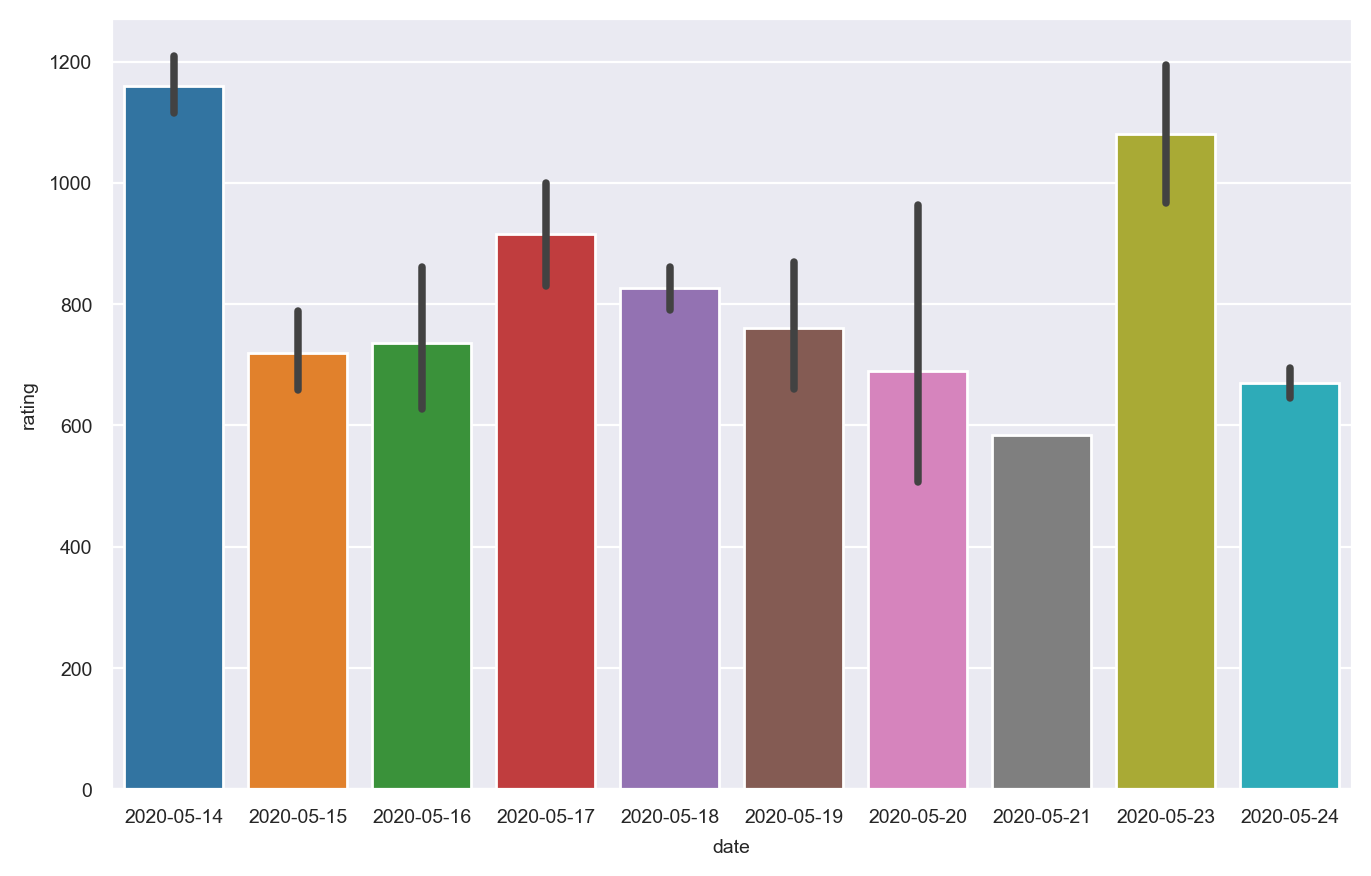

In [120]:
from datetime import date
data_with_date = data.assign(date=data['timestamp'].astype(str).str[:10])

plt.rcParams.update({'font.size': 7})
bars = sns.barplot(x='date', y='rating', data=data_with_date.sort_values('date'))
plt.show()

Сохраните график в формате pdf (так он останется векторизованным).

In [121]:
bars.get_figure().savefig("mean_rating_for_day_barplot.pdf")

### 2. Распределение студентов по курсам.

<span style="color:red">!!!ВНИМАТЕЛЬНО ИЗУЧИТЕ ТЕКСТ НИЖЕ!!!</span>.

<span style="color:orange">Если во время выполнения заданий у вас вознинут вопросы -- еще раз перечитайте текст целиком, скорее всего ответы уже содержатся в нем.</span>

Теперь вам нужно распределить студентов по осенним курсам по выбору, учитывая их предпочтения.

Алгоритм распределения студентов по курсам:
1. По умолчанию на каждой дисциплине по выбору у 3 и 4 курсов может учиться 1 группа (до 30 студентов). Исключения описаны ниже. На blended-дисциплинах для четверокурсников количество мест не ограничено.
2. Проводится первая волна отбора. Для каждой дисциплины формируется список тех, кто указал её первым приоритетом (если студент должен выбрать два курса по выбору, то для него дисциплины, которые он указал первым и вторым приоритетом, рассматриваются как дисциплины первого приоритета). Если желающих больше, чем мест, то выбирается топ по перцентилю рейтинга.
3. На дисциплинах, где остались места после первой волны, формируются списки тех, кто выбрал их вторым приоритетом, и места заполняются лучшими по перцентили рейтинга студентами. После этого проводится такая же процедура для дисциплин третьего приоритета.
4. Если студент не попал на необходимое количество курсов по итогам трёх волн, с ним связывается учебный офис и решает вопрос в индивидуальном порядке.

Обращаем ваше внимание на следующие детали:
- Конкурс на каждый курс общий для 3-го и 4-го курса

- По умолчанию студент выбирает один осенний и один весенний курс по выбору, а также четверокурсники выбирают один blended-курс. Студенты групп 17-го года специализаций МОП и ТИ выбирают по 2 осенних и 2 весенних курса по выбору, также студенты групп 18' специализации МИ выбирают 2 осенних курса. <i>Для студентов, которые выбирают 2 курса (например, осенних) первый приоритет — <code>fall_1</code> и <code>fall_2</code>, второй приоритет — <code>fall_3</code>. Такие студенты участвуют только в двух волнах отбора</i>.

- Студенты специализации МОП не могут выбрать весенним курсом по выбору Машинное обучение 2. **Если студент специализации МОП выбрал Машинное обучение 2, то его приоритеты сдвигаются.** Из-за совпадений первого и второго курса по выбору двигать приоритеты не надо.

- Blended-курсы не трогайте, по ним не надо распределять, на другие курсы они никак не влияют.

- Заведомо известно, что в процессе распределения не возникнет ситуации, когда на одно место претендуют студенты с одинаковым перцентилем.

- Постарайтесь воздержаться от использования циклов там, где это возможно. <i>Допустимо итерироваться по <b>курсам</b>, на которые проводится отбор, и по <b>волнам</b> отбора. Если вы придумаете, как обойтись и без этих циклов, то на усмотрение проверяющего могут быть добавлены бонусные баллы. <b>Дублирование кода не признается успешным избавлением от циклов</b></i>

- На выходе ожидается файл res_fall.csv с результатами распределения на осенние курсы по выбору. Файл должен быть следующего формата:

    * Три колонки: ID, course1, course2
    
    * Если студент не попал на курс, но должен был, то вместо названия курса в ячейке должна быть строка "???"
    
    * Если студент должен выбрать только один курс, то в колонке course2 для него должна стоять строка "-"
    
    * Если студент должен выбрать два курса по выбору, то порядок в колонках course1 и course2 не важен.
    
    * hint: для сохранения воспользуйтесь df.to_csv('solution.csv', index=None)
    

Для работы вам могут понадобиться следующие данные:

- Результаты опроса (вы уже использовали этот файл в первой части задания, но на всякий случай ссылка: https://www.dropbox.com/s/f4rm8sjc3v99p0m/_end_seminar.xlsx?dl=0)

- Соответствие номеров групп специализациям:

    * 171, 172 - МОП; 173 - ТИ; 174 — АДИС; 175, 176 — РС; 177 — АПР
    
    * У студентов 18-го года номера групп соответствуют номерам до распределения по специализациям. Это означает, что по номеру группы 18* нельзя однозначно определить специализацию студента. При этом в рамках распределения важно знать информацию только о двух из них: МОП и МИ. Эти знание можно получить из колонок 'is_ml_student
' и 'is_mi' соответственно.

- Ограничения по количеству мест на курсах по выбору:

    * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)

    * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


Кстати, убедитесь, что в данных больше нет пропусков и повторных записей.

#### 0. Проверка

Для начала давайте убедимся, что вы успешно выполнили задания первой части и проверим ваши данные на наличие пропусков и повторов:

In [122]:
assert data.shape[0] == 347, 'В таблице остались повторы или потеряны данные'

assert data.isna().sum().sum() == 0, 'В таблице остались пропуски'

Если вы не получили AssertionError, то можете продолжать.

#### 1. [1 балл] Создайте новый признак, обозначающий, сколько осенних курсов должен выбрать студент

В этом вам может помочь информация о специализации и группе стундента.

In [123]:
# Засейвимся.
df = data.copy(deep=True)
df = df.sort_index().reset_index(drop=True)
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0


In [124]:
df['fall_courses_to_choose'] = 1 + (df['17_group'].isin([171, 172, 173]) | (df['18_group'] != 0) & (df['is_mi'] == 1))
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,1
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,1
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2


Проверка:

In [125]:
col_name = 'fall_courses_to_choose'

assert(df[df['id'] == '2662600c2c37e11e62f6ee0b88452f22'][col_name] == 2).all()
assert(df[df['id'] == 'd555d2805e1d93d4f023e57dc4c8f403'][col_name] == 2).all()
assert(df[df['id'] == '8fe79f84f36e3a5d2d6745621321302c'][col_name] == 1).all()
assert(df[df['id'] == 'e4caca755ee0bdd711e18fb8084958b5'][col_name] == 1).all()

#### 2. [2 балла] Распределите студентов в соответствии с первым приоритетом

In [126]:
# - Ограничения по количеству мест на курсах по выбору:
# * Осенние: везде 30 мест, кроме Statistical Learning Theory (60 мест), Высокопроизводительных вычислений (60 мест), Анализа неструктурированных данных ($\infty$ мест)
# * Весенние: везде 30 мест, кроме Обучения с подкреплением (60 мест), Анализа данных в бизнесе (60 мест).


course_quote = pd.Series(index=np.unique(df.loc[:, 'fall_1':'fall_2'].values), data=30)
# course_quote['quote'] = 30
course_quote['Statistical Learning Theory'] = 60
course_quote['Высокопроизводительные вычисления'] = 60
course_quote['Анализ неструктурированных данных'] = np.inf

course_quote

Statistical Learning Theory                             60.0
Анализ неструктурированных данных                        inf
Байесовские методы машинного обучения                   30.0
Безопасность компьютерных систем                        30.0
Высокопроизводительные вычисления                       60.0
Глубинное обучение в обработке звука                    30.0
Матричные вычисления                                    30.0
Моделирование временных рядов                           30.0
Принятие решений в условиях риска и неопределённости    30.0
Сбор и обработка данных с помощью краудсорсинга         30.0
Теория баз данных                                       30.0
Язык SQL                                                30.0
dtype: float64

In [127]:
students_with_2_courses = df[df['fall_courses_to_choose'] == 2]
students_with_2_courses_copy = students_with_2_courses.copy()


students_with_2_courses_copy.loc[:, 'fall_1'] = students_with_2_courses_copy['fall_2']
students_with_2_courses_copy.loc[:, ['fall_2', 'fall_3']] = np.nan

students_with_2_courses.loc[:, 'fall_2'] = students_with_2_courses['fall_3']
students_with_2_courses.loc[:, 'fall_3'] = np.nan

students_with_2_courses

C:\Users\dm1tr\AppData\Local\Temp\ipykernel_16008\2532784616.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_with_2_courses.loc[:, 'fall_2'] = students_with_2_courses['fall_3']
C:\Users\dm1tr\AppData\Local\Temp\ipykernel_16008\2532784616.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  students_with_2_courses.loc[:, 'fall_3'] = np.nan


,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose
33,2020-05-16 21:11:40.100,2662600c2c37e11e62f6ee0b88452f22,627,182.0,1.0,Statistical Learning Theory,Принятие решений в условиях риска и неопределё...,NaN,Машинное обучение 2,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.520179,0.0,,0.0,2
42,2020-05-17 12:11:23.296,39cd1820459fdbcc193f9bb0ddb74a58,606,184.0,1.0,Безопасность компьютерных систем,Statistical Learning Theory,NaN,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да,0.623318,0.0,,0.0,2
69,2020-05-18 14:37:56.162,47a0391ff6ee0a09d11e595266a4b630,679,185.0,1.0,Матричные вычисления,Язык SQL,NaN,Анализ данных в бизнесе,Численные методы,Промышленное программирование на языке Java,Да,0.273543,0.0,,0.0,2
77,2020-05-18 17:01:49.352,9750aa503b095b9297e1a778d6c7cc95,576,186.0,1.0,Язык SQL,Принятие решений в условиях риска и неопределё...,NaN,Анализ данных в бизнесе,Системы баз данных,Дискретная оптимизация,Да,0.757848,0.0,,0.0,2
79,2020-05-18 17:16:47.961,701078e1e897399f675e96bdda5fb149,636,188.0,1.0,Сбор и обработка данных с помощью краудсорсинга,Теория баз данных,NaN,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,Да,0.475336,0.0,,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2020-05-18 23:58:07.072,2c0a8cb6662b9a0a0a5d2d1214442767,1107,0.0,0.0,Анализ неструктурированных данных,Моделирование временных рядов,NaN,Обучение с подкреплением,Компьютерное зрение,Конфликты и кооперация,Да,0.666667,172.0,Соревновательный анализ данных,0.0,2
340,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,0.0,0.0,Байесовские методы машинного обучения,Statistical Learning Theory,NaN,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,0.0,2
341,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Анализ неструктурированных данных,NaN,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,0.0,2
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Анализ неструктурированных данных,NaN,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2


In [128]:
students_with_2_courses_copy

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose
33,2020-05-16 21:11:40.100,2662600c2c37e11e62f6ee0b88452f22,627,182.0,1.0,Сбор и обработка данных с помощью краудсорсинга,NaN,NaN,Машинное обучение 2,Промышленное программирование на языке Java,Дополнительные главы прикладной статистики,Да,0.520179,0.0,,0.0,2
42,2020-05-17 12:11:23.296,39cd1820459fdbcc193f9bb0ddb74a58,606,184.0,1.0,Сбор и обработка данных с помощью краудсорсинга,NaN,NaN,Машинное обучение 2,Промышленное программирование на языке Java,Анализ данных в бизнесе,Да,0.623318,0.0,,0.0,2
69,2020-05-18 14:37:56.162,47a0391ff6ee0a09d11e595266a4b630,679,185.0,1.0,Моделирование временных рядов,NaN,NaN,Анализ данных в бизнесе,Численные методы,Промышленное программирование на языке Java,Да,0.273543,0.0,,0.0,2
77,2020-05-18 17:01:49.352,9750aa503b095b9297e1a778d6c7cc95,576,186.0,1.0,Теория баз данных,NaN,NaN,Анализ данных в бизнесе,Системы баз данных,Дискретная оптимизация,Да,0.757848,0.0,,0.0,2
79,2020-05-18 17:16:47.961,701078e1e897399f675e96bdda5fb149,636,188.0,1.0,Принятие решений в условиях риска и неопределё...,NaN,NaN,Промышленное программирование на языке Java,Машинное обучение 2,Анализ данных в бизнесе,Да,0.475336,0.0,,0.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,2020-05-18 23:58:07.072,2c0a8cb6662b9a0a0a5d2d1214442767,1107,0.0,0.0,Глубинное обучение в обработке звука,NaN,NaN,Обучение с подкреплением,Компьютерное зрение,Конфликты и кооперация,Да,0.666667,172.0,Соревновательный анализ данных,0.0,2
340,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,0.0,0.0,Глубинное обучение в обработке звука,NaN,NaN,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,0.0,2
341,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,0.0,0.0,Байесовские методы машинного обучения,NaN,NaN,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,0.0,2
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Statistical Learning Theory,NaN,NaN,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2


In [129]:
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,1
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,1
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2


In [130]:
fully_df = pd.concat([df[df['fall_courses_to_choose'] < 2], students_with_2_courses, students_with_2_courses_copy]).reset_index(drop=True)
fully_df = fully_df[~fully_df.duplicated(subset=['id', 'fall_1'], keep='last')]
fully_df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
431,2020-05-18 23:58:07.072,2c0a8cb6662b9a0a0a5d2d1214442767,1107,0.0,0.0,Глубинное обучение в обработке звука,NaN,NaN,Обучение с подкреплением,Компьютерное зрение,Конфликты и кооперация,Да,0.666667,172.0,Соревновательный анализ данных,0.0,2
432,2020-05-19 08:55:39.509,98c5a2548d93f26bd4195466e93178b3,1035,0.0,0.0,Глубинное обучение в обработке звука,NaN,NaN,Обучение с подкреплением,Генеративные модели в машинном обучении,Методы сжатия и передачи медиаданных,Нет,0.905797,171.0,DevOps,0.0,2
433,2020-05-19 18:58:06.283,ba298cbd9be59b84bab33325e956f27e,1155,0.0,0.0,Байесовские методы машинного обучения,NaN,NaN,Конфликты и кооперация,Обучение с подкреплением,Компьютерное зрение,Да,0.507246,171.0,Соревновательный анализ данных,0.0,2
434,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Statistical Learning Theory,NaN,NaN,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2


In [131]:
id_first_prior = fully_df[['id', 'fall_1', 'percentile']].sort_values(['fall_1', 'percentile'])
id_first_prior

,id,fall_1,percentile
277,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,0.000000
140,723d5f32b699c971b4095a017c883ffa,Statistical Learning Theory,0.017937
377,b3cbd3541c0cf66ff4eb2bc1596bb149,Statistical Learning Theory,0.021739
86,1f63fc485d851236249263b91dc03d6b,Statistical Learning Theory,0.031390
6,e4caca755ee0bdd711e18fb8084958b5,Statistical Learning Theory,0.103139
...,...,...,...
172,162cbdeec1b766ab857df93cdf9d65f4,Язык SQL,0.852018
144,cfe9fd28e4cbe0b46594b21f3067e30a,Язык SQL,0.856502
106,a19f36ae8465cac527e8ce7b6ebf1213,Язык SQL,0.901345
36,ab5248060fbaac411a79a62dfb0d263d,Язык SQL,0.946188


In [132]:
id_first_prior['pos'] = id_first_prior.groupby('fall_1')['id'].cumcount().add(1)
id_first_prior['quote'] = course_quote[id_first_prior['fall_1']].values
id_first_prior

,id,fall_1,percentile,pos,quote
277,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,0.000000,1,60.0
140,723d5f32b699c971b4095a017c883ffa,Statistical Learning Theory,0.017937,2,60.0
377,b3cbd3541c0cf66ff4eb2bc1596bb149,Statistical Learning Theory,0.021739,3,60.0
86,1f63fc485d851236249263b91dc03d6b,Statistical Learning Theory,0.031390,4,60.0
6,e4caca755ee0bdd711e18fb8084958b5,Statistical Learning Theory,0.103139,5,60.0
...,...,...,...,...,...
172,162cbdeec1b766ab857df93cdf9d65f4,Язык SQL,0.852018,25,30.0
144,cfe9fd28e4cbe0b46594b21f3067e30a,Язык SQL,0.856502,26,30.0
106,a19f36ae8465cac527e8ce7b6ebf1213,Язык SQL,0.901345,27,30.0
36,ab5248060fbaac411a79a62dfb0d263d,Язык SQL,0.946188,28,30.0


In [133]:
id_first_prior_filtered = id_first_prior[id_first_prior['pos'] <= id_first_prior['quote']]
id_first_prior_filtered.sort_values('percentile')

,id,fall_1,percentile,pos,quote
277,3a7326c9e355a67d3805824ca34c4bc5,Statistical Learning Theory,0.000000,1,60.0
74,3e106aaef8b24dbb01319c73e14c2936,Безопасность компьютерных систем,0.000000,1,30.0
366,3a7326c9e355a67d3805824ca34c4bc5,Высокопроизводительные вычисления,0.000000,1,60.0
84,e0ca1a9548af9a3f98428c62420aa484,Матричные вычисления,0.004484,1,30.0
211,7fe7df0d207babbf30249b3063ac1f26,Высокопроизводительные вычисления,0.007246,2,60.0
...,...,...,...,...,...
18,af20596134e83f3ca61259b325aa9688,Statistical Learning Theory,0.973094,33,60.0
318,f2e1cfc27a724879ac2a8c98004c14b0,Принятие решений в условиях риска и неопределё...,0.978261,6,30.0
435,79d14db48e4737af731960ae212d5134,Принятие решений в условиях риска и неопределё...,0.985507,7,30.0
243,d539461bf254cf8b3201cdf7990b119e,Анализ неструктурированных данных,0.992754,48,inf


In [134]:
grp_count =  id_first_prior_filtered.groupby('id')['id'].count()
has_both = grp_count[grp_count > 1].index
has_both = id_first_prior_filtered[id_first_prior_filtered['id'].isin(has_both)]

first_course = id_first_prior_filtered.groupby('id')['fall_1'].first()
first_course = pd.DataFrame({'id':first_course.index, 'course_1':first_course.values})

second_course = has_both.groupby('id')['fall_1'].last()
second_course = pd.DataFrame({'id':second_course.index, 'course_2':second_course.values})

fall_courses = pd.concat([first_course, second_course]).reset_index(drop=True)
fall_courses

,id,course_1,course_2
0,01b072a0cdb45814fc4ab8ca3e621f0e,Анализ неструктурированных данных,NaN
1,044e038535ae5d2ff037150b77fdc6d1,Безопасность компьютерных систем,NaN
2,04b88fcbe5ba58aa8369c7de5e574de0,Безопасность компьютерных систем,NaN
3,04bcb5c9d23813ffa940e1febb27fadc,Теория баз данных,NaN
4,04f9a2dd035a040318ecd064959df3a0,Безопасность компьютерных систем,NaN
...,...,...,...
323,fc833a2815fa010d53b0047244438d9d,NaN,Байесовские методы машинного обучения
324,fc8b84c5df1ea8bf6e5da51945124d57,NaN,Высокопроизводительные вычисления
325,fe631bea98b075dd781e11df3987533b,NaN,Моделирование временных рядов
326,fecff7bd30995d16b59fb392d47b3760,NaN,Безопасность компьютерных систем


In [135]:
df = df.merge(first_course, on='id', how='left')
df = df.merge(second_course, on='id', how='left')
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose,course_1,course_2
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1,Язык SQL,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1,Высокопроизводительные вычисления,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1,Statistical Learning Theory,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1,Высокопроизводительные вычисления,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,1,Statistical Learning Theory,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,1,Анализ неструктурированных данных,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2,Statistical Learning Theory,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Принятие решений в условиях риска и неопределё...,NaN


In [136]:
df.loc[df['fall_courses_to_choose'] < 2, 'course_2'] = np.nan
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose,course_1,course_2
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1,Язык SQL,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1,Высокопроизводительные вычисления,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1,Statistical Learning Theory,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1,Высокопроизводительные вычисления,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,1,Statistical Learning Theory,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,1,Анализ неструктурированных данных,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2,Statistical Learning Theory,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Принятие решений в условиях риска и неопределё...,NaN


In [137]:
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,fall_courses_to_choose,course_1,course_2
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,1,Язык SQL,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,1,Высокопроизводительные вычисления,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,1,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,1,Statistical Learning Theory,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,1,Высокопроизводительные вычисления,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,1,Statistical Learning Theory,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,1,Анализ неструктурированных данных,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,2,Statistical Learning Theory,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,2,Принятие решений в условиях риска и неопределё...,NaN


Здесь для проверки приведена таблица, в которой есть 2 дополнительные колонки:
    
    1) is_first_place - является ли студент лучшим по перцентили хотя бы на одном из курсов, куда он был зачислен 
    (True / NaN)
    
    2) is_last_place  - является ли студент худшим по перцентили хотя бы на одном из курсов, куда он был зачислен (True / NaN)

In [138]:
first = id_first_prior_filtered.groupby('fall_1')['id'].first().values
df['is_first_place'] = df['id'].isin(first)
df.loc[~df['is_first_place'], 'is_first_place'] = np.nan

In [139]:
last = id_first_prior_filtered.groupby('fall_1')['id'].last().values
df['is_last_place'] = df['id'].isin(last)
df.loc[~df['is_last_place'], 'is_last_place'] = np.nan


In [140]:
df = df.drop('fall_courses_to_choose', axis=1)
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,spring_3,is_first_time,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.183857,0.0,,0.0,Язык SQL,NaN,True,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,Машинное обучение 2,Нет,0.426009,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,Численные методы,Да,0.538117,0.0,,0.0,NaN,NaN,NaN,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,Машинное обучение 2,Да,0.744395,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,Численные методы,Да,0.780269,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,Компьютерное зрение,Да,0.920290,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,Численные методы,Да,0.840580,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Численные методы,Да,0.652174,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,NaN,NaN,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,Компьютерное зрение,Да,0.985507,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,NaN,NaN,NaN


In [141]:
# !wget  -O '2_task_check.csv' -q 'https://www.dropbox.com/s/v8o2zzq3iz5gc9w/_2_task_check.csv?dl=0'
check_df = pd.read_csv('2_task_check.csv')

После распределения студентов в соответствии с первым приоритетом добавьте в свой датафрейм аналогичные признаки и запустите проверку:

In [142]:
fir_col_name = 'is_first_place'
last_col_name = 'is_last_place'


assert((df[df[fir_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
        ==
        check_df[check_df['is_first_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ).id.values).all()


assert((df[df[last_col_name].isna() == False][['id']].sort_values('id').reset_index(drop=True)
       ==
       check_df[check_df['is_last_place'].isna() == False][['id']].sort_values('id').reset_index(drop=True)
      ).id.values).all()

In [143]:
df['fall_courses_to_choose'] = 1 + (df['17_group'].isin([171, 172, 173]) | (df['18_group'] != 0) & (df['is_mi'] == 1))
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,is_first_time,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,Да,0.183857,0.0,,0.0,Язык SQL,NaN,True,NaN,1
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,...,Нет,0.426009,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,Да,0.538117,0.0,,0.0,NaN,NaN,NaN,NaN,1
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,Да,0.744395,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN,1
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,...,Да,0.780269,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,...,Да,0.920290,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN,1
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,...,Да,0.840580,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN,1
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,Да,0.652174,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,NaN,NaN,NaN,2
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,Да,0.985507,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,NaN,NaN,NaN,2


#### 3. [3 балла] Проведите все три волны отбора студентов на курсы по выбору

In [144]:
df[(df['course_1'].isna()) & (df['course_2'].isna()) & (df['fall_courses_to_choose'] > 1)]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,is_first_time,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose
284,2020-05-18 18:27:32.822,7fcf56aae6836855a689000a50e80360,1145,0.0,0.0,Безопасность компьютерных систем,Безопасность компьютерных систем,Безопасность компьютерных систем,Символьные вычисления,Символьные вычисления,...,Да,0.536232,173.0,Введение в дифференциальную геометрию,0.0,NaN,NaN,NaN,NaN,2
288,2020-05-18 19:36:56.962,0c0cbdd1a309c1d1fd8993c4dc907bb5,1065,0.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Моделирование временных рядов,Компьютерное зрение,Методы сжатия и передачи медиаданных,...,Да,0.833333,172.0,Соревновательный анализ данных,0.0,NaN,NaN,NaN,NaN,2
304,2020-05-18 21:46:53.813,d40cbae8cfc9e6c5d05831ef7e122f3e,1092,0.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Обучение с подкреплением,...,Да,0.724638,172.0,DevOps,0.0,NaN,NaN,NaN,NaN,2


In [145]:
filled = pd.DataFrame([df.groupby('course_2')['id'].count(), df.groupby('course_1')['id'].count()]).sum()
second_wave_quote = course_quote - filled

In [146]:
second_wave_quote

Statistical Learning Theory                             27.0
Анализ неструктурированных данных                        inf
Байесовские методы машинного обучения                    6.0
Безопасность компьютерных систем                         0.0
Высокопроизводительные вычисления                       16.0
Глубинное обучение в обработке звука                     7.0
Матричные вычисления                                    15.0
Моделирование временных рядов                            0.0
Принятие решений в условиях риска и неопределённости    22.0
Сбор и обработка данных с помощью краудсорсинга          0.0
Теория баз данных                                       16.0
Язык SQL                                                 1.0
dtype: float64

In [147]:
has_no_course_ids = df.loc[(df['course_1'].isna()) | (df['course_2'].isna() & (df['fall_courses_to_choose'] > 1)), 'id']

df.loc[df['id'].isin(has_no_course_ids)]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,is_first_time,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,Да,0.538117,0.0,,0.0,NaN,NaN,NaN,NaN,1
16,2020-05-15 16:58:06.959,64173586abab6f7a172946c8c74bde0d,630,181.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Язык SQL,Компьютерные сети,Промышленное программирование на языке Java,...,Да,0.502242,0.0,,0.0,NaN,NaN,NaN,NaN,1
20,2020-05-15 21:55:16.699,f0f6f3881894172a0f04e79b554b49e6,673,181.0,0.0,Безопасность компьютерных систем,Сбор и обработка данных с помощью краудсорсинга,Принятие решений в условиях риска и неопределё...,Машинное обучение 2,Численные методы,...,Да,0.300448,0.0,,1.0,NaN,NaN,NaN,NaN,1
22,2020-05-15 22:30:31.902,a65d50ef4fadfac64508a54e972d8623,626,184.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,Нет,0.526906,0.0,,0.0,NaN,NaN,NaN,NaN,1
23,2020-05-15 22:41:51.724,cddf159101f9a5a30f9041ceebdb2835,651,181.0,0.0,Безопасность компьютерных систем,Теория баз данных,Язык SQL,Дискретная оптимизация,Компьютерные сети,...,Да,0.408072,0.0,,0.0,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
334,2020-05-18 23:54:25.376,cef24632489091cb8c085688b7d78dec,1095,0.0,0.0,Глубинное обучение в обработке звука,Сбор и обработка данных с помощью краудсорсинга,Анализ неструктурированных данных,Обучение с подкреплением,Генеративные модели в машинном обучении,...,Нет,0.717391,172.0,Соревновательный анализ данных,0.0,Глубинное обучение в обработке звука,NaN,NaN,NaN,2
337,2020-05-18 23:58:33.903,8fe79f84f36e3a5d2d6745621321302c,1016,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Сбор и обработка данных с помощью краудсорсинга,Конфликты и кооперация,Проектирование и разработка высоконагруженных ...,...,Да,0.942029,174.0,DevOps,0.0,NaN,NaN,NaN,NaN,1
339,2020-05-18 23:59:28.998,9963fc00d9405a35b894cc04a7e19855,1135,0.0,0.0,Безопасность компьютерных систем,Высокопроизводительные вычисления,Безопасность компьютерных систем,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,Да,0.572464,175.0,DevOps,0.0,NaN,NaN,NaN,NaN,1
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,Да,0.652174,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,NaN,NaN,NaN,2


In [148]:
fully_df_second = fully_df[['id', 'fall_2', 'percentile']]
has_no_course_ids = df.loc[(df['course_1'].isna()) | (df['course_2'].isna() & (df['fall_courses_to_choose'] > 1)), 'id']

id_second_prior = fully_df_second.loc[fully_df_second['id'].isin(has_no_course_ids)].sort_values(['fall_2', 'percentile']).dropna()
id_second_prior['pos'] = id_second_prior.groupby('fall_2')['id'].cumcount().add(1)
id_second_prior['quote'] = second_wave_quote[id_second_prior['fall_2']].values

id_second_prior

,id,fall_2,percentile,pos,quote
76,7f9d0f835bf734ccd4619041c3475c1c,Statistical Learning Theory,0.228700,1,27.0
34,2ba0a356c95af4fe74272e708082086f,Statistical Learning Theory,0.304933,2,27.0
82,fd784637a19d65bbe5b07d6efac5a05d,Statistical Learning Theory,0.533632,3,27.0
333,eb1d7205d913319ef3d48e0719839849,Statistical Learning Theory,0.608696,4,27.0
259,39cd1820459fdbcc193f9bb0ddb74a58,Statistical Learning Theory,0.623318,5,27.0
...,...,...,...,...,...
143,00b40fe7dbfd23e5daba765244509415,Язык SQL,0.896861,10,1.0
91,32fea7beb180e7de64ad408013cc01ec,Язык SQL,0.910314,11,1.0
102,f5d9f99cb876ca0888d18b6e444fa1b1,Язык SQL,0.982063,12,1.0
151,40b18d40197e3db66312a026e06b8ff1,Язык SQL,0.986547,13,1.0


In [149]:
id_second_prior_filtered = id_second_prior[id_second_prior['pos'] <= id_second_prior['quote']]
id_second_prior_filtered = id_second_prior_filtered.rename(columns={'fall_2': 'course_3'})
id_second_prior_filtered.sort_values('percentile')

,id,course_3,percentile,pos,quote
70,081eba3952cfc116e0e9b941d6a974a2,Матричные вычисления,0.215247,1,15.0
94,d08d06bc5d31e35616fafc59de6f2e34,Матричные вычисления,0.219731,2,15.0
75,86eebda725013685effcb0c97591132e,Язык SQL,0.224215,1,1.0
76,7f9d0f835bf734ccd4619041c3475c1c,Statistical Learning Theory,0.228700,1,27.0
246,31e38f7596f83b72ebba1c6fc6b7a590,Высокопроизводительные вычисления,0.239130,1,16.0
175,2b844a1be49f4ed2d578fb50b752883b,Матричные вычисления,0.246637,3,15.0
203,8e8d87fd686122d2c061d7b1eea2d3c5,Высокопроизводительные вычисления,0.253623,2,16.0
60,b8d4c538f6b47a1a692bec6c2f29152b,Высокопроизводительные вычисления,0.260090,3,16.0
283,492c677be00bb8223ebbaffa3aff2549,Глубинное обучение в обработке звука,0.260870,1,7.0
160,6541d659f05e45043d1b65e98e16a718,Матричные вычисления,0.264574,4,15.0


In [150]:
df = df.merge(id_second_prior_filtered[['id', 'course_3']].set_index('id'), on='id', how='left')
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose,course_3
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.183857,0.0,,0.0,Язык SQL,NaN,True,NaN,1,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,...,0.426009,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,0.538117,0.0,,0.0,NaN,NaN,NaN,NaN,1,Матричные вычисления
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.744395,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,...,0.780269,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,...,0.920290,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,...,0.840580,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN,1,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,0.652174,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,NaN,NaN,NaN,2,Анализ неструктурированных данных
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,0.985507,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,NaN,NaN,NaN,2,Анализ неструктурированных данных


In [151]:
df['course_1'] = df['course_1'].combine_first(df['course_3'])
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose,course_3
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.183857,0.0,,0.0,Язык SQL,NaN,True,NaN,1,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,...,0.426009,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,0.538117,0.0,,0.0,Матричные вычисления,NaN,NaN,NaN,1,Матричные вычисления
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.744395,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,...,0.780269,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,...,0.920290,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,...,0.840580,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN,1,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,0.652174,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,NaN,NaN,NaN,2,Анализ неструктурированных данных
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,0.985507,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,NaN,NaN,NaN,2,Анализ неструктурированных данных


In [152]:
df.loc[(df['fall_courses_to_choose'] > 1) & (~df['course_3'].isna()) & (df['course_3'] != df['course_1']), 'course_2'] =\
    df[(df['fall_courses_to_choose'] > 1) & (~df['course_3'].isna()) & (df['course_3'] != df['course_1'])]['course_3']
# df.loc[df['course_1'] == df['course_2'], 'course_2'] = np.nan
df
# df.loc[(df['fall_courses_to_choose'] > 1) & (~df['course_3'].isna()) & (df['course_3'] != df['course_1']), :]

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,percentile,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose,course_3
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.183857,0.0,,0.0,Язык SQL,NaN,True,NaN,1,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,...,0.426009,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,0.538117,0.0,,0.0,Матричные вычисления,NaN,NaN,NaN,1,Матричные вычисления
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.744395,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,...,0.780269,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,...,0.920290,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,...,0.840580,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN,1,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,0.652174,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,Анализ неструктурированных данных,NaN,NaN,2,Анализ неструктурированных данных
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,0.985507,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,NaN,NaN,2,Анализ неструктурированных данных


In [153]:
filled = pd.DataFrame([df.groupby('course_2')['id'].count(), df.groupby('course_1')['id'].count()]).sum()
third_wave_quote = course_quote - filled
third_wave_quote

Statistical Learning Theory                             19.0
Анализ неструктурированных данных                        inf
Байесовские методы машинного обучения                    5.0
Безопасность компьютерных систем                         0.0
Высокопроизводительные вычисления                        0.0
Глубинное обучение в обработке звука                     0.0
Матричные вычисления                                     6.0
Моделирование временных рядов                            0.0
Принятие решений в условиях риска и неопределённости    21.0
Сбор и обработка данных с помощью краудсорсинга          0.0
Теория баз данных                                       12.0
Язык SQL                                                 0.0
dtype: float64

In [154]:
fully_df_third = fully_df[['id', 'fall_3', 'percentile']]
has_no_course_ids = df.loc[df['course_1'].isna() , 'id']

id_third_prior = fully_df_third[fully_df_third['id'].isin(has_no_course_ids)].sort_values(['fall_3', 'percentile']).dropna()
id_third_prior['pos'] = id_third_prior.groupby('fall_3')['id'].cumcount().add(1)
id_third_prior['quote'] = third_wave_quote[id_third_prior['fall_3']].values

id_third_prior

,id,fall_3,percentile,pos,quote
197,253bbe1a2021d0404712a1e4acd22939,Statistical Learning Theory,0.673913,1,19.0
150,f2ed8115db45ef795ced2701fa86515d,Statistical Learning Theory,0.766816,2,19.0
199,8c3aa7371731bef999519c3de2c47423,Анализ неструктурированных данных,0.695652,1,inf
198,1bbbfae51794b83c769b634be8da7b8d,Анализ неструктурированных данных,0.789855,2,inf
228,aeb7bb1e047c392b7e5e39225cd86422,Анализ неструктурированных данных,0.898551,3,inf
43,34f75b81eb7b1cc9e9e4ef5bfd7fa69a,Высокопроизводительные вычисления,0.278027,1,0.0
242,07b6ce7fd93bde95ce5fe14a5131a960,Высокопроизводительные вычисления,0.485507,2,0.0
183,efc406545c2b0e958ec89b4c1e4f7a28,Высокопроизводительные вычисления,0.582960,3,0.0
244,085da16dd3062b4790c3dabdc08a51cf,Высокопроизводительные вычисления,0.876812,4,0.0
154,227347077a7d1d0544ddf5643b97cf8c,Матричные вычисления,0.488789,1,6.0


In [155]:
id_third_prior_filtered = id_third_prior[id_third_prior['pos'] <= id_third_prior['quote']]
id_third_prior_filtered = id_third_prior_filtered.rename(columns={'fall_3': 'course_4'})
id_third_prior_filtered.sort_values('percentile')

,id,course_4,percentile,pos,quote
20,f0f6f3881894172a0f04e79b554b49e6,Принятие решений в условиях риска и неопределё...,0.300448,1,21.0
154,227347077a7d1d0544ddf5643b97cf8c,Матричные вычисления,0.488789,1,6.0
90,5ee2ad618729a6dc3bdb7f2858826ef0,Теория баз данных,0.513453,1,12.0
110,2b0d7dd550bcca4c586cbb27d8478aa8,Матричные вычисления,0.560538,2,6.0
122,a6ce02b12540bca3cdd15757f8a2e919,Матричные вычисления,0.663677,3,6.0
100,1c1623a037bd523d687245e6060e6c5b,Теория баз данных,0.672646,2,12.0
197,253bbe1a2021d0404712a1e4acd22939,Statistical Learning Theory,0.673913,1,19.0
199,8c3aa7371731bef999519c3de2c47423,Анализ неструктурированных данных,0.695652,1,inf
150,f2ed8115db45ef795ced2701fa86515d,Statistical Learning Theory,0.766816,2,19.0
116,5c49473012411a1eee72f8ea63767adf,Теория баз данных,0.773543,3,12.0


In [156]:
df = df.merge(id_third_prior_filtered[['id', 'course_4']].set_index('id'), on='id', how='left')
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose,course_3,course_4
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.0,,0.0,Язык SQL,NaN,True,NaN,1,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,...,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,0.0,,0.0,Матричные вычисления,NaN,NaN,NaN,1,Матричные вычисления,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,...,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,...,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,...,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN,1,NaN,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,Анализ неструктурированных данных,NaN,NaN,2,Анализ неструктурированных данных,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,NaN,NaN,2,Анализ неструктурированных данных,NaN


In [157]:
df['course_1'] = df['course_1'].combine_first(df['course_4'])
df

,timestamp,id,rating,18_group,is_mi,fall_1,fall_2,fall_3,spring_1,spring_2,...,17_group,blended,is_ml_student,course_1,course_2,is_first_place,is_last_place,fall_courses_to_choose,course_3,course_4
0,2020-05-15 01:12:50.543,93ff79a51cd602f1dd3028ba2c129503,698,181.0,0.0,Язык SQL,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.0,,0.0,Язык SQL,NaN,True,NaN,1,NaN,NaN
1,2020-05-15 02:46:48.066,26b01b1c4cd5656bab18d24c548834fb,647,181.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Язык SQL,Дискретная оптимизация,Численные методы,...,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN,NaN
2,2020-05-15 03:12:41.480,30f3653fc176d54e89ac3179c455c6dd,624,185.0,0.0,Безопасность компьютерных систем,Матричные вычисления,Моделирование временных рядов,Дискретная оптимизация,Машинное обучение 2,...,0.0,,0.0,Матричные вычисления,NaN,NaN,NaN,1,Матричные вычисления,NaN
3,2020-05-15 04:43:08.994,1528f0eaa027580820ccf0d92a53ad68,579,182.0,0.0,Statistical Learning Theory,Высокопроизводительные вычисления,Матричные вычисления,Дискретная оптимизация,Численные методы,...,0.0,,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN,NaN
4,2020-05-15 07:47:17.197,496ea4f0d4abe264b1bb1b80eb3830c5,572,183.0,0.0,Высокопроизводительные вычисления,Безопасность компьютерных систем,Теория баз данных,Компьютерные сети,Дискретная оптимизация,...,0.0,,0.0,Высокопроизводительные вычисления,NaN,NaN,NaN,1,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342,2020-05-19 19:04:17.873,c5870b37ee3f672e4259dfb2fc02ed8f,1029,0.0,0.0,Statistical Learning Theory,Анализ неструктурированных данных,Сбор и обработка данных с помощью краудсорсинга,Обучение с подкреплением,Конфликты и кооперация,...,174.0,DevOps,0.0,Statistical Learning Theory,NaN,NaN,NaN,1,NaN,NaN
343,2020-05-19 20:19:25.815,f44aea1095f9f5b8e2f5f0ed2b17891b,1060,0.0,0.0,Анализ неструктурированных данных,Высокопроизводительные вычисления,Моделирование временных рядов,Конфликты и кооперация,Обучение с подкреплением,...,174.0,DevOps,0.0,Анализ неструктурированных данных,NaN,NaN,NaN,1,NaN,NaN
344,2020-05-20 11:54:38.318,d7118b44c7e8fdbbaaca226d2da6fef1,1111,0.0,0.0,Сбор и обработка данных с помощью краудсорсинга,Statistical Learning Theory,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,173.0,Соревновательный анализ данных,0.0,Statistical Learning Theory,Анализ неструктурированных данных,NaN,NaN,2,Анализ неструктурированных данных,NaN
345,2020-05-23 21:16:40.916,79d14db48e4737af731960ae212d5134,966,0.0,0.0,Безопасность компьютерных систем,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,Проектирование и разработка высоконагруженных ...,Методы сжатия и передачи медиаданных,...,172.0,DevOps,0.0,Принятие решений в условиях риска и неопределё...,Анализ неструктурированных данных,NaN,NaN,2,Анализ неструктурированных данных,NaN


In [158]:
df.loc[df['fall_courses_to_choose'] < 2, 'course_2'] = '-'


In [159]:
res = df[['id', 'course_1', 'course_2']]
res.columns = ['ID', 'course1', 'course2']
res = res.fillna('???')

In [160]:
res.to_csv('res_fall.csv', index=None)

### Почта: dashagarov@edu.hse.ru, посылка: 70614042 (https://contest.yandex.ru/contest/40211/run-report/70614042/)

**Отправьте свой файл res_fall.csv в контест (https://contest.yandex.ru/contest/40211/problems/A/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

*Дисклеймер:*

Успешная посылка в контесте является **обязательным** условием получения полного балла за этот (и следующий) пункт. Если добиться успешной посылки не удастся, баллы будут выставляться на усмотрение проверяюшего. 

При этом ОК в контесте не гарантирует полный балл. Оценка всё равно может быть снижена в случае обнаружения неэффективностей или ошибок в коде. Если вы сдадите в AnyTask очевидно неработающий код или ноутбук без кода, но при этом в контест будет сдан корректный файл, то это будет расцениваться как плагиат.

На всякий случай просим вас сдать вместе с ноутбуком файл res_fall.csv в anytask

**Дополнительное задание. [2 бонусных балла] Распределите таким же образом студентов еще и на весенние курсы по выбору.**

Если ваш код был хорошо структурирован, то это не составит проблем. 

Если вы выполнили это задание, сдайте среди прочего файл res_spring.csv в таком же формате, как и res_fall.csv.

In [1096]:
# (￣^'￣)ゞ

**Отправьте свой файл res_spring.csv в контест (https://contest.yandex.ru/contest/40211/problems/B/) и прикрепите/укажите ниже ваш никнейм и ссылку на успешную посылку.**

На всякий случай просим вас сдать вместе с ноутбуком файл res_spring.csv в anytask

Вставьте картинку, описывающую ваш опыт выполнения этого задания:

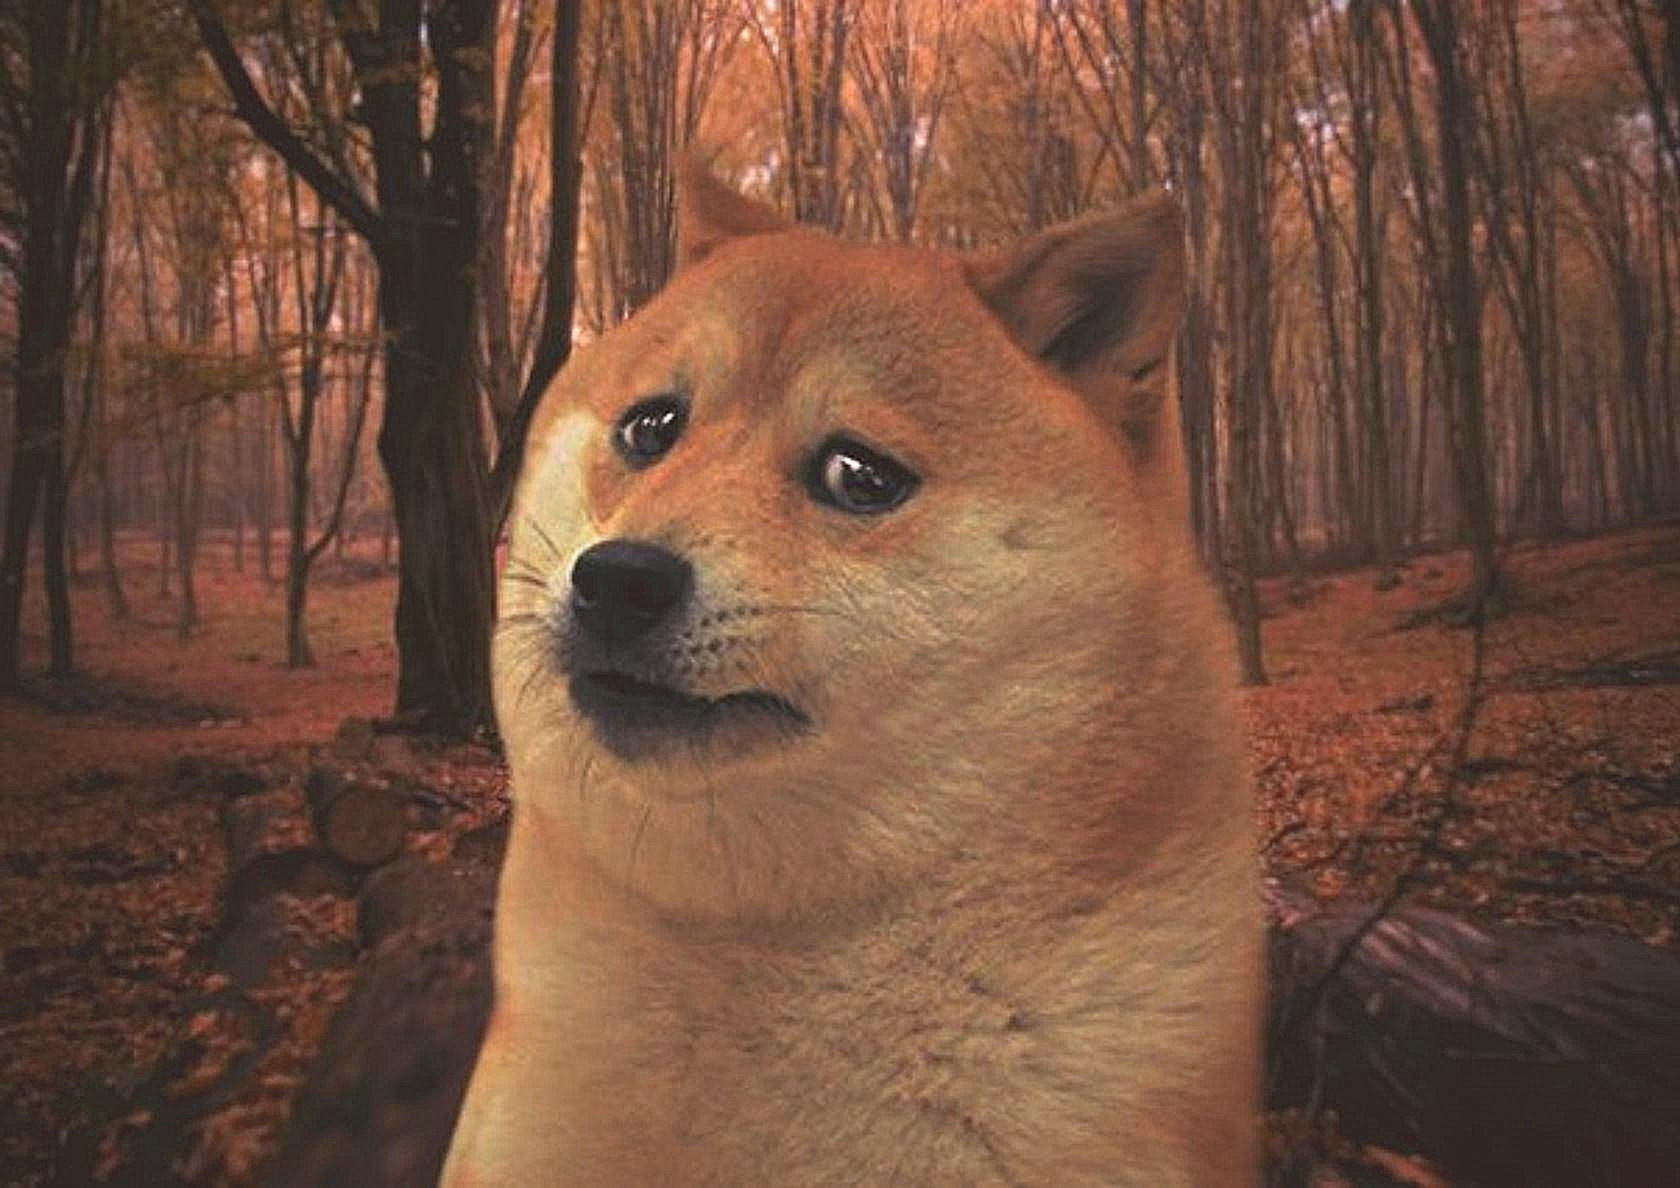

In [166]:
# Датаспелл не хочет подгружать картинку через !, поэтому го так
from IPython import display
# display.Image("pic.jpeg")